# Exploratory Data Analysis - Testing Notebook

This notebook serves as a dedicated sandbox for testing and validating the functions implemented in `visualization.py`. Unlike the main EDA notebook, the focus here is not on producing final insights but on experimenting, debugging, and ensuring that visualizations render correctly.

The objectives of this testing notebook are:\**a. Verify that processed datasets integrate smoothly with the visualization module\
b. Confirm that charts and plots behave as expected before inclusion in the main analysis\
c. Document trial runs and solutions to errors encountered during development**

By keeping this notebook separate, the workflow remains organized: the main notebooks showcase polished analysis, while the sandbox captures the iterative testing process.

In [1]:
%run ../src/visualization.py

In [2]:
import pandas as pd

sales = pd.read_csv("../data/cleaned/sales_clean.csv")
time_dim = pd.read_csv("../data/cleaned/time_dimension.csv")

In [3]:
sales = sales.merge(time_dim, left_on="Order Date", right_on="Date", how="left")

In [4]:
monthly_sales = sales.groupby(["Year","Month"])["Sales"].sum().reset_index()
monthly_sales["YearMonth"] = monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str)

seg_summary = sales.groupby("Segment")["Sales"].sum().reset_index()

return_rate_category = sales.groupby("Category")["Returned"].apply(lambda x: (x == "Yes").mean()).reset_index()
return_rate_category.rename(columns={"Returned":"ReturnRate"}, inplace=True)

crosstab_region = pd.crosstab(sales["Region"], sales["Returned"], normalize="index")

In [ ]:
print(return_rate_category)

In [ ]:
print(sales["Returned"].unique())
print(sales["Returned"].value_counts())

In [5]:
import os
os.makedirs("../reports/figures", exist_ok=True)

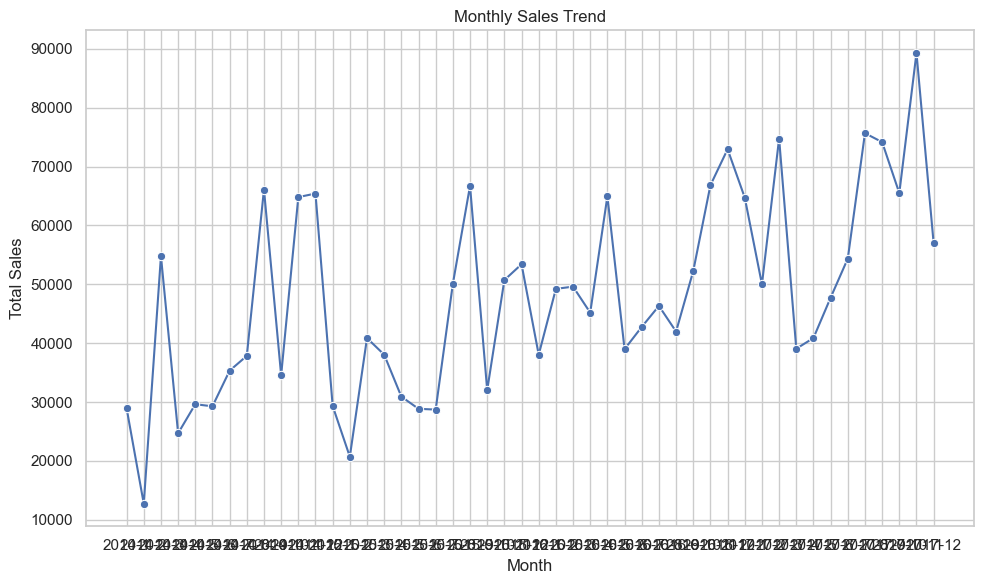

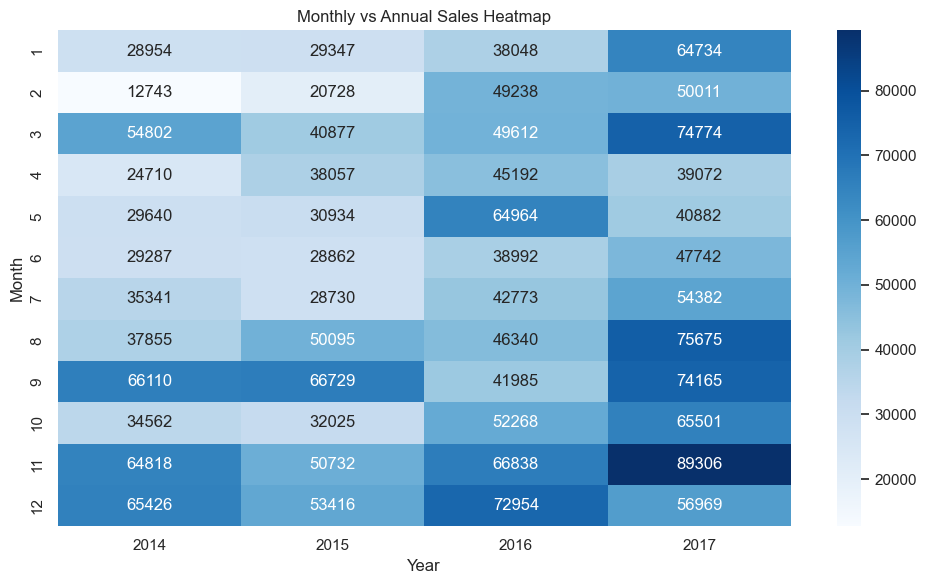

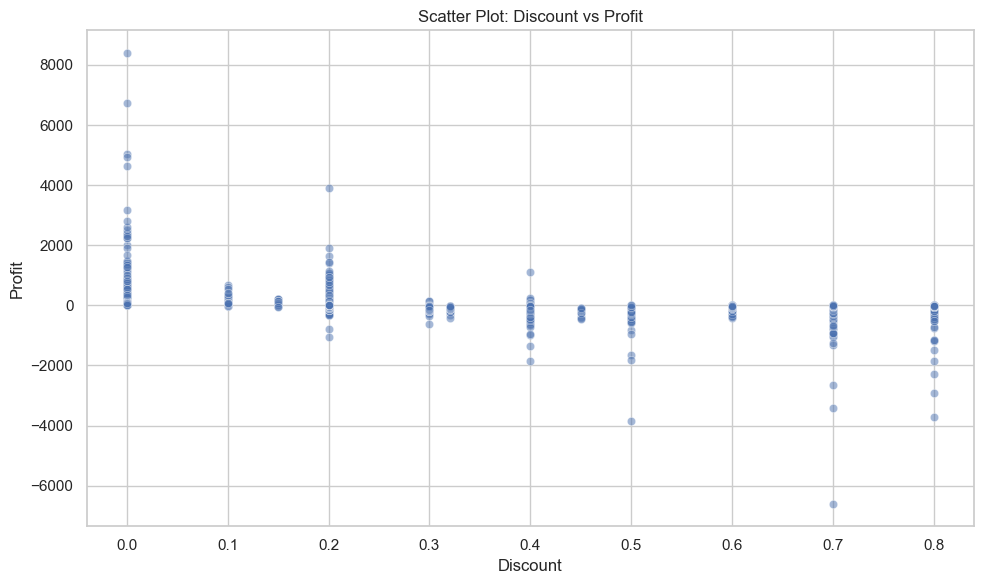

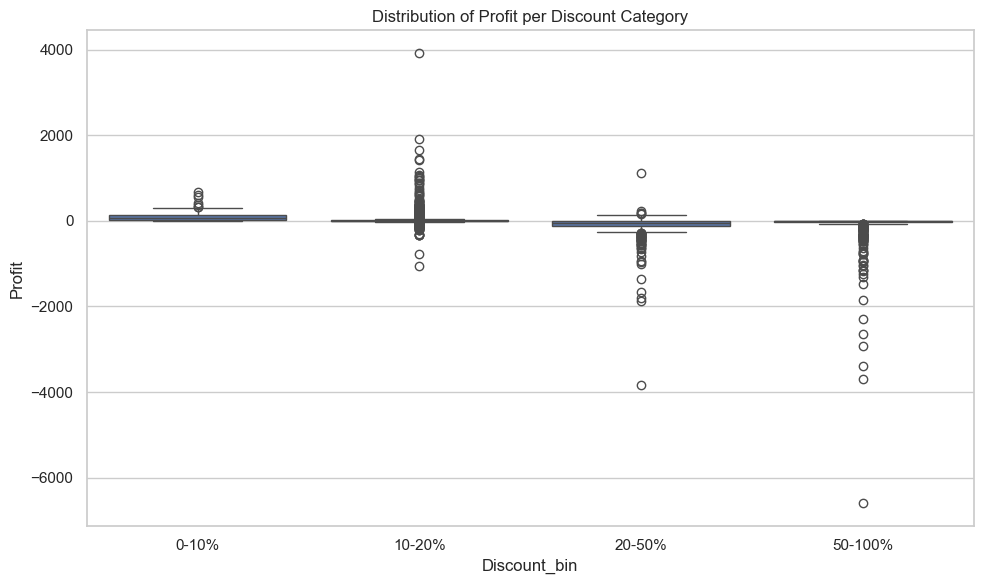

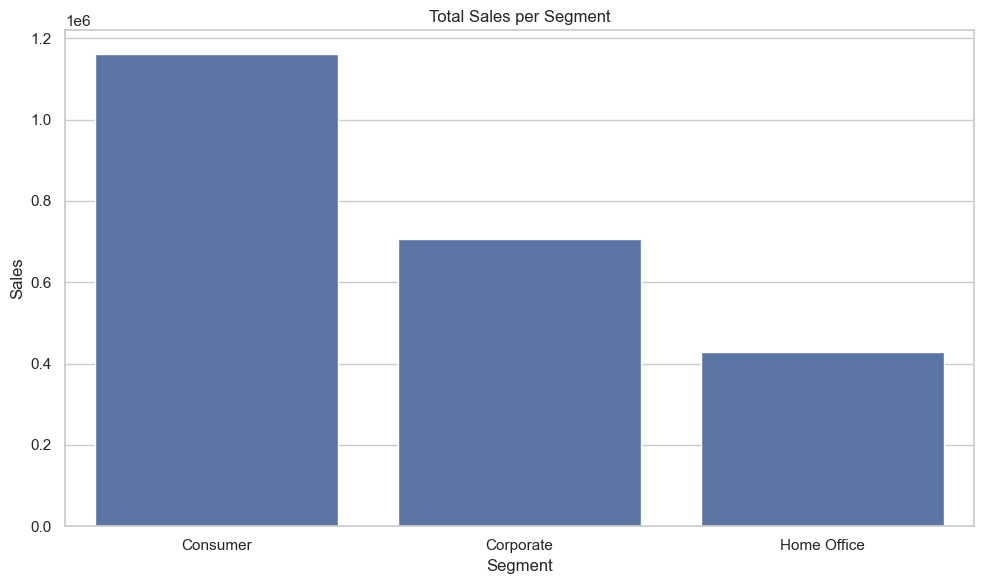

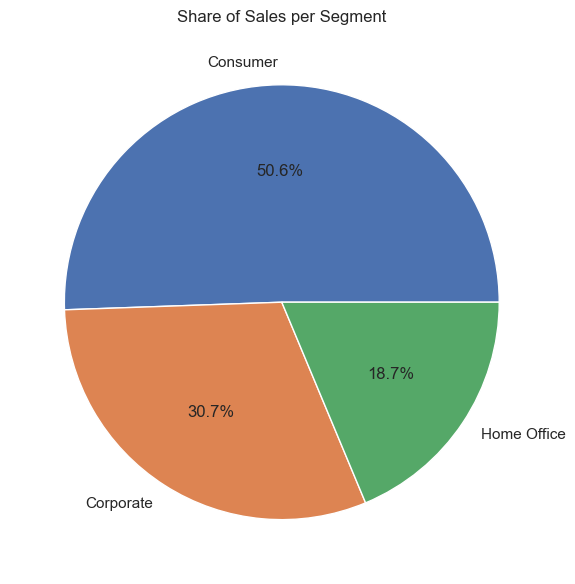

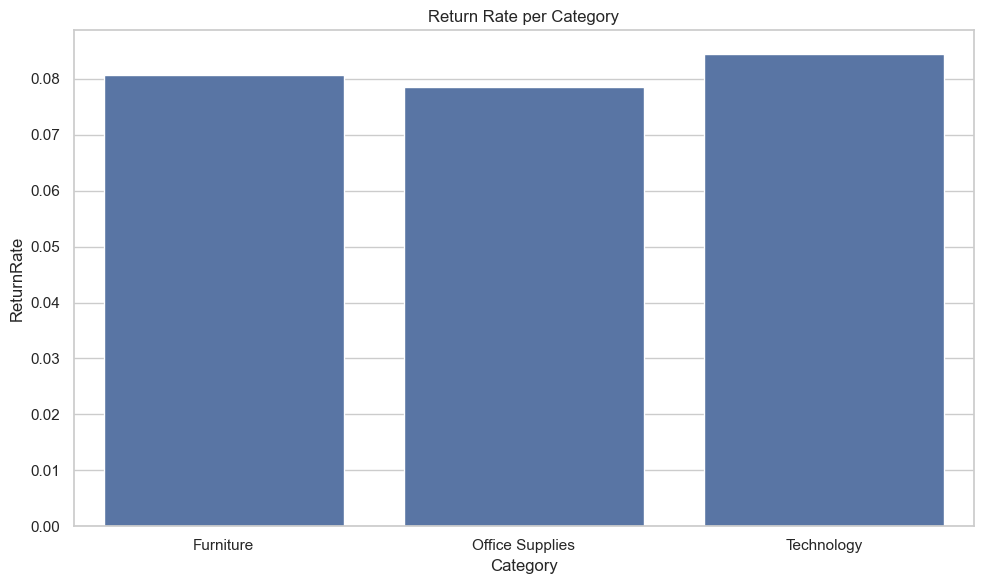

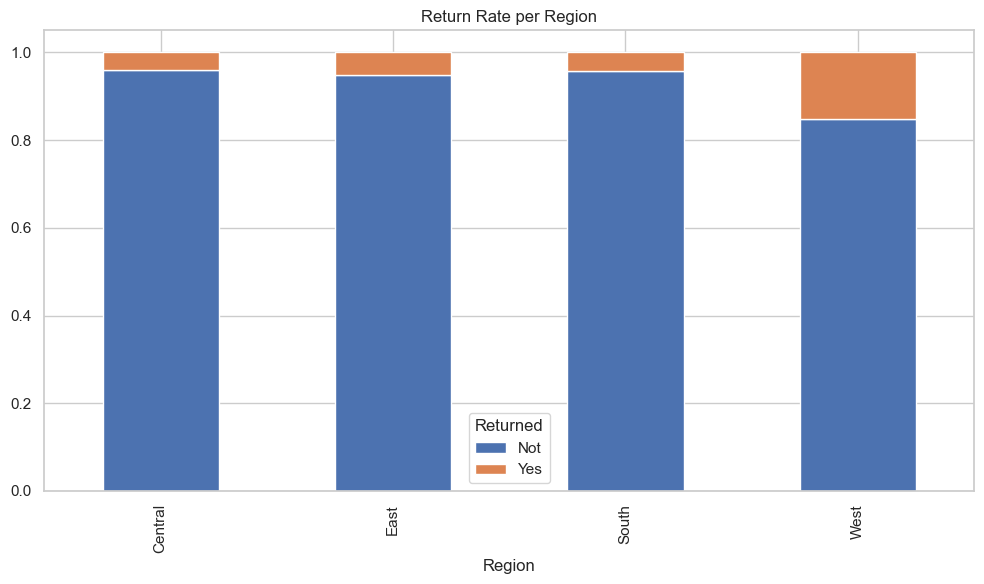

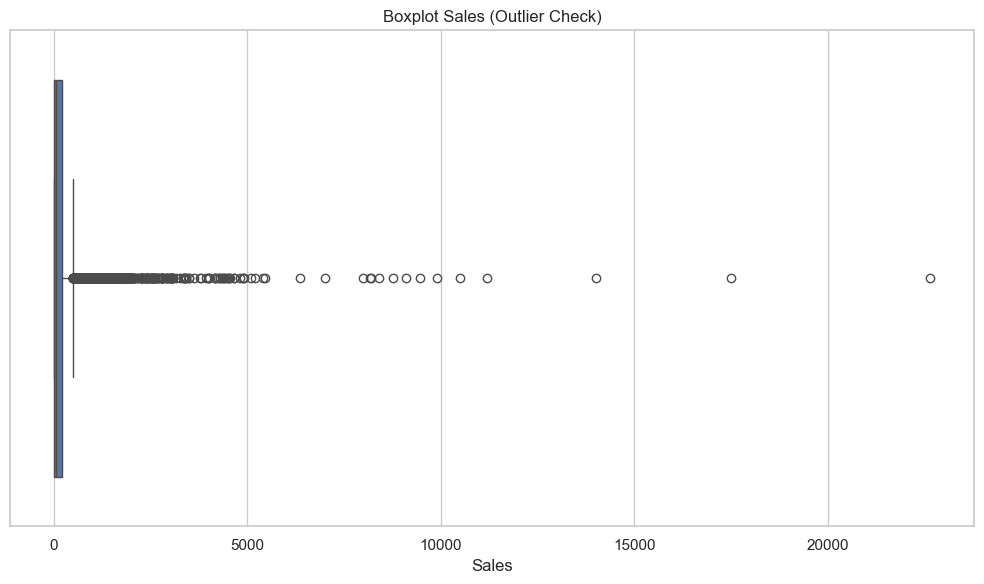

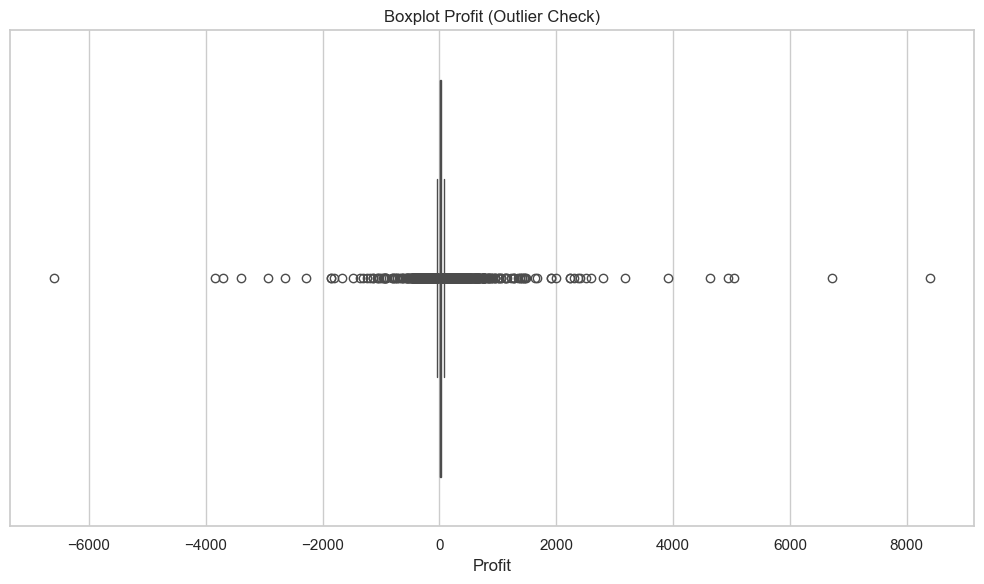

In [7]:
plot_sales_trend(monthly_sales)
plot_sales_heatmap(monthly_sales)
plot_discount_vs_profit(sales)
plot_profit_by_discount_bin(sales)
plot_segment_sales(seg_summary)
plot_segment_pie(seg_summary)
plot_return_rate_category(return_rate_category)
plot_return_rate_region(crosstab_region)
plot_sales_outliers(sales)
plot_profit_outliers(sales)

This testing notebook has fulfilled its purpose as a sandbox for experimenting with the visualization functions and validating their integration with the processed datasets. The focus here was on debugging, trial runs, and ensuring that plots behave as expected before being incorporated into the main analysis.

Unlike the primary EDA notebook, the results presented here are not intended as polished insights but as checkpoints in the development process. By separating testing from the core analysis, the workflow remains organized and transparent: the main notebooks showcase structured findings, while the sandbox captures the iterative steps that made those results possible.